In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
%matplotlib inline
categories = data.target_names
categories
train = fetch_20newsgroups(subset='train', categories= categories)
test = fetch_20newsgroups(subset='test', categories = categories)



In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

labels= model.predict(test.data)

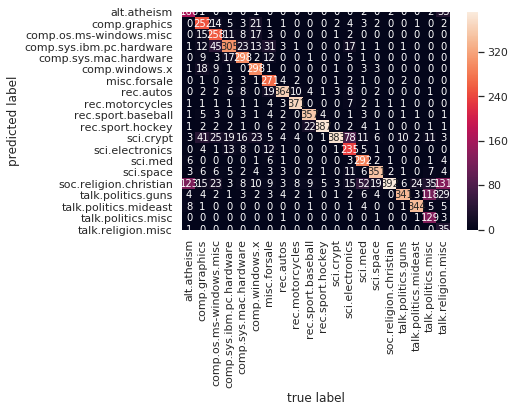

In [4]:
from sklearn.metrics import confusion_matrix 
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, annot=True, fmt='d'
           ,xticklabels=train.target_names
           ,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [5]:
def predict_category(s, train=train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [6]:
predict_category('Sending data to International Space Station')

'sci.space'

In [7]:
predict_category('BMW is better than Audi')

'rec.autos'